<a href="https://colab.research.google.com/github/PeixotoJr/APD/blob/main/Matriz_de_Correla%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação de Bibliotecas
### Importa as bibliotecas necessárias:

* pandas para manipulação de dados.
* seaborn e matplotlib para visualização de dados.
* LabelEncoder da sklearn para converter dados categóricos em numéricos.
* plotly e cufflinks para visualização interativa de gráficos.





In [ ]:
#!pip install chart_studio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# plotly packages
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

## Carrega o conjunto de dados penguins_size.csv em um DataFrame df e exibe as primeiras linhas para verificação.

In [ ]:
# Carregar o arquivo CSV
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Mostra informações sobre o DataFrame, incluindo tipos de dados, quantidade de valores não nulos e uso de memória.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Remove todas as linhas com valores ausentes no DataFrame e imprime o tamanho do DataFrame após a remoção.

In [ ]:
df = df.dropna()
print(df.shape)

(334, 7)


## Gera estatísticas descritivas, incluindo contagem, média, desvio padrão, valores mínimos, máximos e quartis para todas as colunas.

In [ ]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,334,334,334.000000,334.000000,334.000000,334.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,146,164,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.994311,17.160479,201.014970,4209.056886,NaN
std,NaN,NaN,5.460521,1.967909,14.022175,804.836129,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.575000,18.700000,213.000000,4793.750000,NaN


## Converte as colunas categóricas sex, species, e island para numéricas usando LabelEncoder para facilitar a análise.

In [ ]:
lb = LabelEncoder()
df["sex"] = lb.fit_transform(df["sex"])
df["species"] = lb.fit_transform(df["species"])
df["island"] = lb.fit_transform(df["island"])

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


## Calcula a matriz de correlação para o DataFrame.

In [ ]:
correlation_matrix = df.corr()

## Plota a matriz de correlação usando seaborn e matplotlib para mostrar a relação entre as variáveis do DataFrame.

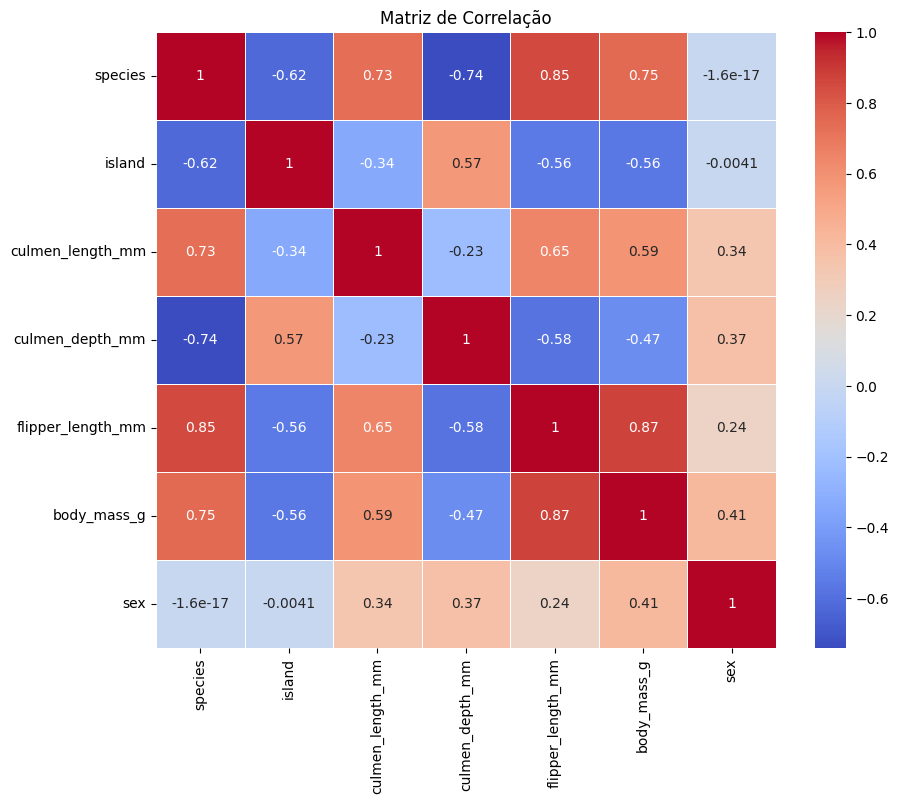

In [ ]:
# Plotar a matriz de correlação usando o Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

## Exibe a contagem de cada valor único na coluna species, útil para entender a distribuição dos dados;

In [ ]:
df['species'].value_counts()

,count
species,
0,146
2,120
1,68


## Cria um boxplot para as variáveis culmen_length_mm, culmen_depth_mm e flipper_length_mm para visualizar a distribuição de dados e identificar possíveis outliers.

<Axes: >

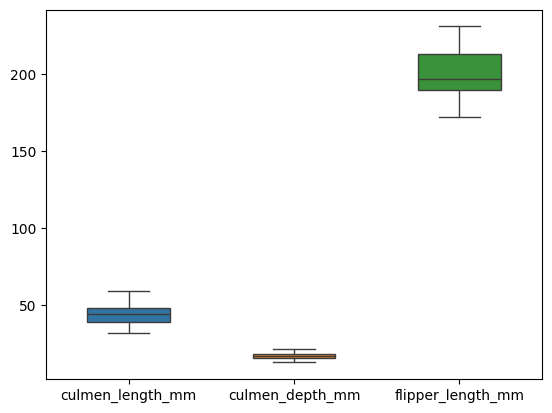

In [ ]:
df1 = df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']]
sns.boxplot(data=df1, width=0.5,fliersize=5)

## Plota gráficos de pares (pairplot) para todas as variáveis, diferenciando as espécies de pinguins com diferentes cores. Ajuda a visualizar a relação entre as variáveis.

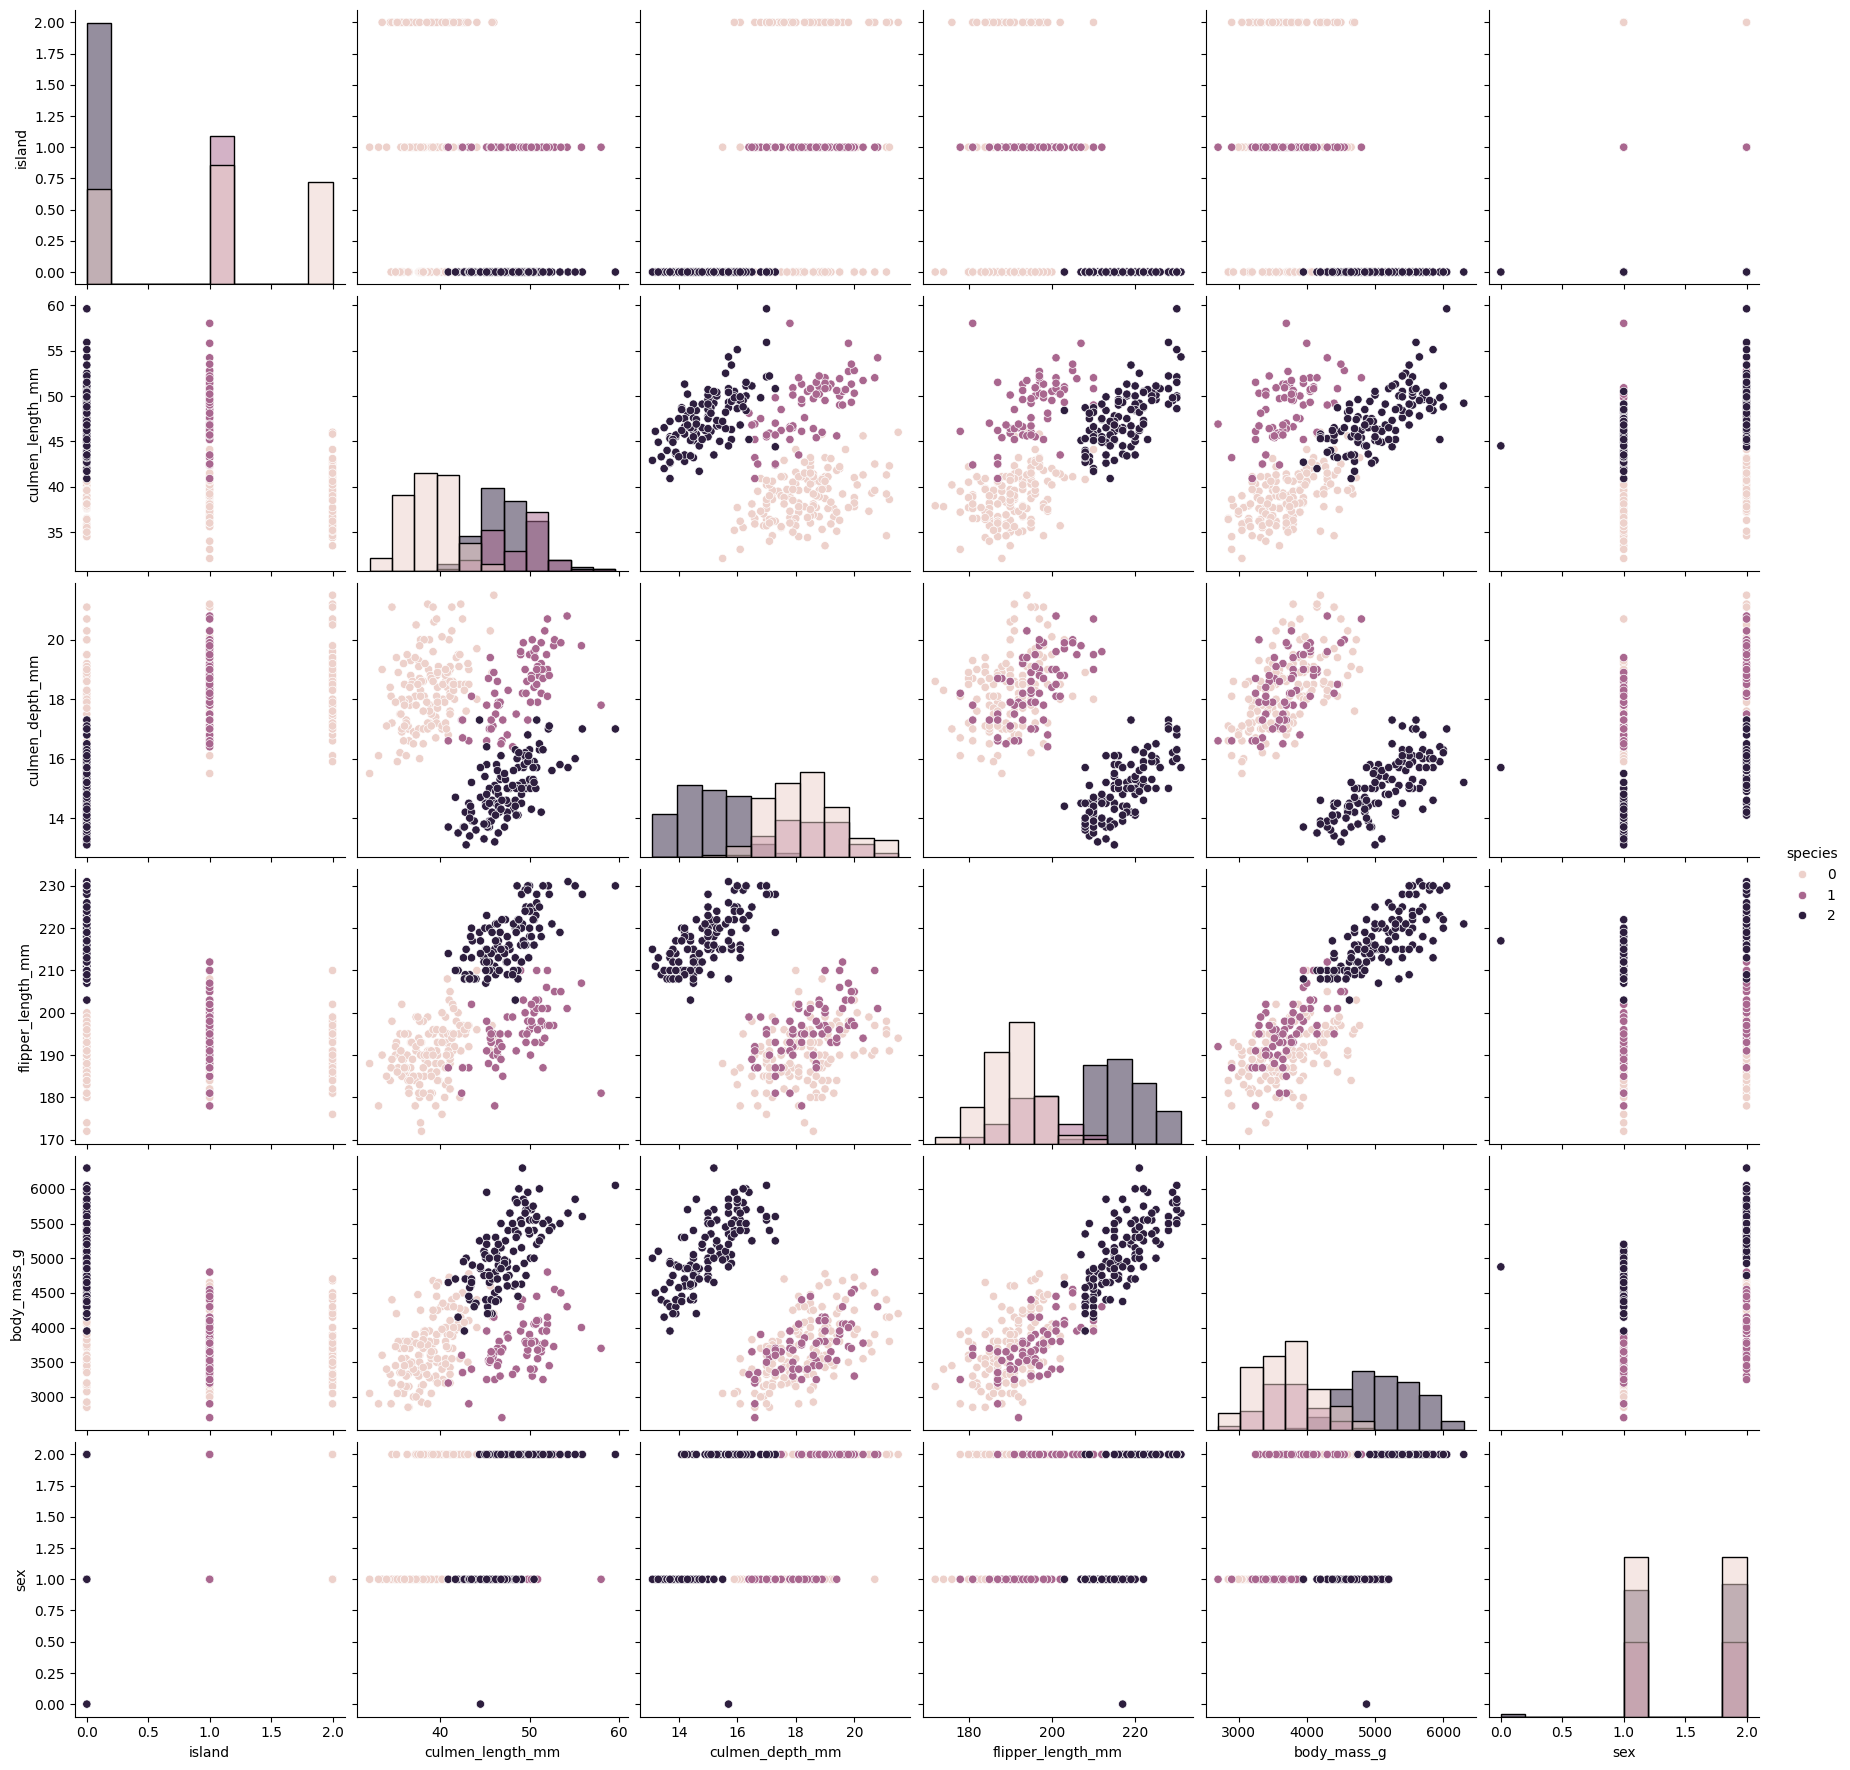

In [ ]:
sns.pairplot(df, hue="species", height=3,diag_kind="hist")

## Cria gráficos de dispersão para visualizar a relação entre culmen_length_mm e culmen_depth_mm, e entre culmen_length_mm e flipper_length_mm, separados por espécie.

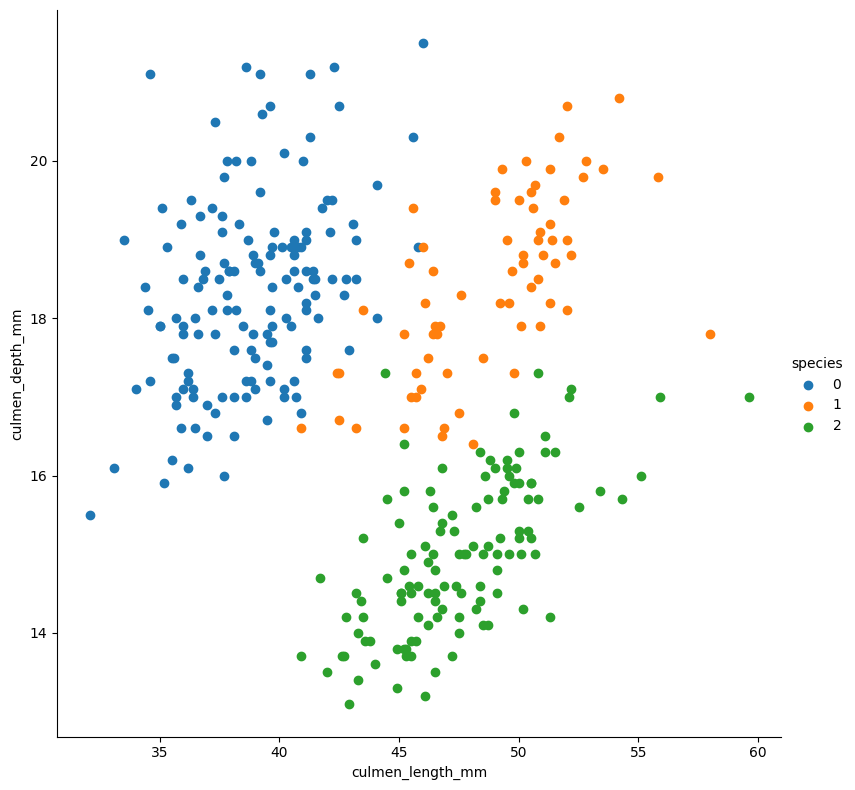

In [ ]:
sns.FacetGrid(df, hue="species", height=8) \
   .map(plt.scatter, "culmen_length_mm", "culmen_depth_mm") \
   .add_legend()

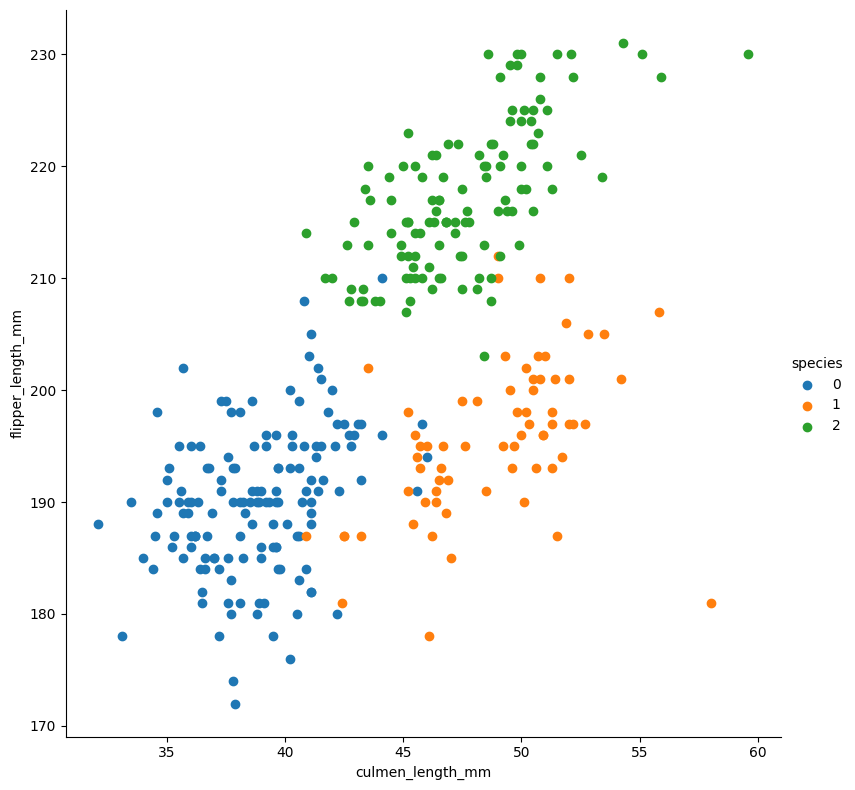

In [ ]:
sns.FacetGrid(df, hue="species", height=8) \
   .map(plt.scatter, "culmen_length_mm", "flipper_length_mm") \
   .add_legend()

## Plota um gráfico de violino para mostrar a distribuição de flipper_length_mm entre as espécies. Violin plots são úteis para visualizar a densidade de distribuição de dados.

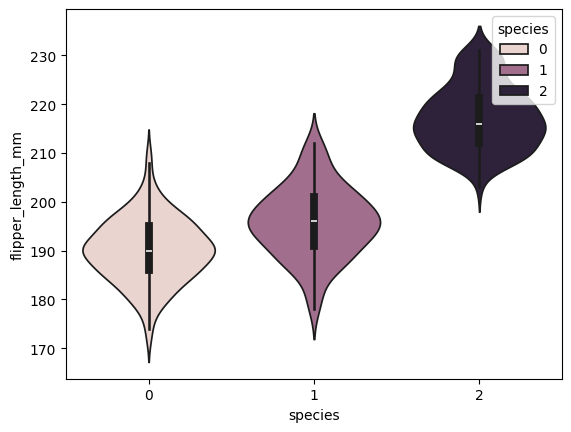

In [ ]:
ax = sns.violinplot(x="species", y="flipper_length_mm", hue="species",data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




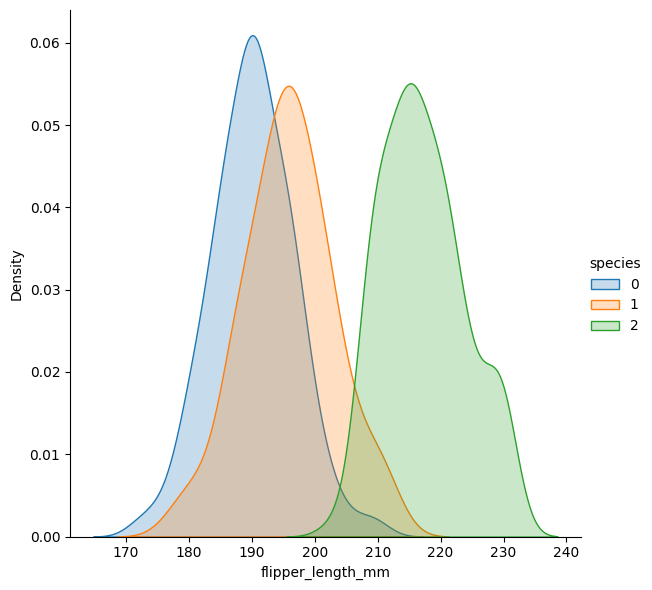

In [ ]:
sns.FacetGrid(df, hue="species", height=6,) \
   .map(sns.kdeplot, "flipper_length_mm",shade=True) \
   .add_legend()